# ATPY User Muanual

## Element Definitions

In [1]:
#  Marker,Drift,ExactDrift, Dipole, Quadrupole, Sextupole, Octupole, Tuning
# Line BeamLine
# Status
# tws_index, kwd_index, loc_index, glb_index


### Directly define element

In [3]:
#-*- for folding -*-
from atpy import*
FM = Marker("FM",)
F1 = Marker("F1",)
LSB2 = Drift("LSB2",l=1.95227266)
LSB1 = Drift("LSB1",l=1.46167866)
LSX = Drift("LSX",l=0.40000000)
LSA2 = Drift("LSA2",l=2.55416484)
LSA1 = Drift("LSA1",l=2.84837711)
LX03 = Drift("LX03",l=0.10000000)
DTUNE0 = Drift("DTUNE0",l=0.78648950)
B1 = Dipole("B1",l=0.50670849, angle=0.03378057, k1=0.00000000, e1=0.50000000, e2=0.50000000)
QSA5 = Quadrupole("QSA5",l=0.30000000, k1=-0.84186052)
QSA4 = Quadrupole("QSA4",l=0.30000000, k1=1.49711117)
QSA3 = Quadrupole("QSA3",l=0.30000000, k1=-1.65566620)
QSA2 = Quadrupole("QSA2",l=0.30000000, k1=1.63095422)
QSA1 = Quadrupole("QSA1",l=0.30000000, k1=-1.70081304)
QF = Quadrupole("QF",l=0.30000000, k1=1.53040414)
QD = Quadrupole("QD",l=0.30000000, k1=-1.52453199)
SF = Sextupole("SF",l=0.20000000, k2=33.88427102)
SD = Sextupole("SD",l=0.20000000, k2=-62.31467841)
SF1 = Sextupole("SF1",l=0.20000000, k2=33.88427102)
SD1 = Sextupole("SD1",l=0.20000000, k2=-62.31467841)
SF2 = Sextupole("SF2",l=0.20000000, k2=33.88427102)
SD2 = Sextupole("SD2",l=0.20000000, k2=-62.31467841)
SUPP = Line("SUPP",LSA1, QSA1, LSA2, QSA2, LSX, B1, LSX, QSA3, LSB1, QSA4, LSB2, QSA5, FM)
FREEFODO = Line("FREEFODO",F1, QF, LSX, DTUNE0, B1, DTUNE0, LSX, QD, LSX, DTUNE0, B1, DTUNE0, LSX)

FODOX1 = Line("FODOX1",F1, QF, LX03, SF1, LX03, DTUNE0, B1, DTUNE0, LSX, QD, LSX, DTUNE0, B1, DTUNE0, LSX)
FODOXY1 = Line("FODOXY1",F1, QF, LX03, SF1, LX03, DTUNE0, B1, DTUNE0, LSX, QD, LX03, SD1, LX03, DTUNE0, B1, DTUNE0, LSX)
FODOY1 = Line("FODOY1",F1, QF, LSX, DTUNE0, B1, DTUNE0, LSX, QD, LX03, SD1, LX03, DTUNE0, B1, DTUNE0, LSX)
FODOX2 = Line("FODOX2",F1, QF, LX03, SF2, LX03, DTUNE0, B1, DTUNE0, LSX, QD, LSX, DTUNE0, B1, DTUNE0, LSX)
FODOXY2 = Line("FODOXY2",F1, QF, LX03, SF2, LX03, DTUNE0, B1, DTUNE0, LSX, QD, LX03, SD2, LX03, DTUNE0, B1, DTUNE0, LSX)
FODOY2 = Line("FODOY2",F1, QF, LSX, DTUNE0, B1, DTUNE0, LSX, QD, LX03, SD2, LX03, DTUNE0, B1, DTUNE0, LSX)

FIVEFODO1 = Line("FIVEFODO1",FODOX1, FREEFODO, FODOXY1, FREEFODO, FODOY1)
FIVEFODO2 = Line("FIVEFODO2",FODOX2, FREEFODO, FODOXY2, FREEFODO, FODOY2)
ARC = Line("ARC",-SUPP, FIVEFODO1,FIVEFODO2, FIVEFODO1,FIVEFODO2,FIVEFODO1,FIVEFODO2, QF, SUPP)


stat=Status( second_order_chrom=True, track_lines=9, monitor_dp=0.02, 
            fast_2nd_order_RDTs=True, max_betax=277.56, max_etax=0.592, third_order_chrom=True, dp=0.00035, rf_dp=0.017, npara=5, 
            computedrivingterms=True, period=  True, track_turns=500 )
tws0={'betax': 6.000000e-02, 'betay': 6.000000e-04}
RING=BeamLine("RING",stat,FREEFODO,**tws0)

### simply difine with translate (without writing element name twice)

In [14]:
#-*- for folding -*-
lat=r"""
    from atpy import*
    FM   = Marker()
    F1   = Marker()
    LSB2     = Drift(l=1.95227266)
    LSB1     = Drift(l=1.46167866)
    LSX  = Drift(l=0.40000000)
    LSA2     = Drift(l=2.55416484)
    LSA1     = Drift(l=2.84837711)
    LX03     = Drift(l=0.10000000)
    DTUNE0   = Drift(l=0.78648950)
    B1   = Dipole(l=0.50670849, angle=0.03378057, k1=0.00000000, e1=0.50000000, e2=0.50000000)
    QSA5     = Quadrupole(l=0.30000000, k1=-0.84186052)
    QSA4     = Quadrupole(l=0.30000000, k1=1.49711117)
    QSA3     = Quadrupole(l=0.30000000, k1=-1.65566620)
    QSA2     = Quadrupole(l=0.30000000, k1=1.63095422)
    QSA1     = Quadrupole(l=0.30000000, k1=-1.70081304)
    QF   = Quadrupole(l=0.30000000, k1=1.53040414)
    QD   = Quadrupole(l=0.30000000, k1=-1.52453199)
    SF   = Sextupole(l=0.20000000, k2=33.88427102)
    SD   = Sextupole(l=0.20000000, k2=-62.31467841)
    SF1   = Sextupole(l=0.20000000, k2=33.88427102)
    SD1   = Sextupole(l=0.20000000, k2=-62.31467841)
    SF2   = Sextupole(l=0.20000000, k2=33.88427102)
    SD2   = Sextupole(l=0.20000000, k2=-62.31467841)
    SUPP     = Line(LSA1, QSA1, LSA2, QSA2, LSX, B1, LSX, QSA3, LSB1, QSA4, LSB2, QSA5, FM)
    FREEFODO     = Line(F1, QF, LSX, DTUNE0, B1, DTUNE0, LSX, QD, LSX, DTUNE0, B1, DTUNE0, LSX)
    FODOXY   = Line(F1, QF, LX03, SF, LX03, DTUNE0, B1, DTUNE0, LSX, QD, LX03, SD, LX03, DTUNE0, B1, DTUNE0, LSX)
    
    FODOX1    = Line(F1, QF, LX03, SF1, LX03, DTUNE0, B1, DTUNE0, LSX, QD, LSX, DTUNE0, B1, DTUNE0, LSX)
    FODOXY1   = Line(F1, QF, LX03, SF1, LX03, DTUNE0, B1, DTUNE0, LSX, QD, LX03, SD1, LX03, DTUNE0, B1, DTUNE0, LSX)
    FODOY1    = Line(F1, QF, LSX, DTUNE0, B1, DTUNE0, LSX, QD, LX03, SD1, LX03, DTUNE0, B1, DTUNE0, LSX)
    FODOX2    = Line(F1, QF, LX03, SF2, LX03, DTUNE0, B1, DTUNE0, LSX, QD, LSX, DTUNE0, B1, DTUNE0, LSX)
    FODOXY2   = Line(F1, QF, LX03, SF2, LX03, DTUNE0, B1, DTUNE0, LSX, QD, LX03, SD2, LX03, DTUNE0, B1, DTUNE0, LSX)
    FODOY2    = Line(F1, QF, LSX, DTUNE0, B1, DTUNE0, LSX, QD, LX03, SD2, LX03, DTUNE0, B1, DTUNE0, LSX)
    
    FIVEFODO1     = Line(FODOX1, FREEFODO, FODOXY1, FREEFODO, FODOY1)
    FIVEFODO2     = Line(FODOX2, FREEFODO, FODOXY2, FREEFODO, FODOY2)
    ARC  = Line(-SUPP, FIVEFODO1,FIVEFODO2, FIVEFODO1,FIVEFODO2,FIVEFODO1,FIVEFODO2, QF, SUPP)
"""

from atpy import*
# translate str to python script
translate(lat)
# import the 
from atpy.tools.translate import*

tws0=dict(betax=10.34965253,   alphax=-2.38935827, betay=1.963445526,  alphay=0.5242721964  ,etax=0.2846300877, etapx= 0.06610030865)
RING=BeamLine("RING",stat,FODOXY,**tws0)

In [34]:
RING?

## BeamLine method

```cython
eval(self, str expr)
parse(self,str code)
save(self)              :
evolution(self,double[:,:] variables, double[:,:] objectives, double[:,:] CV )
calc(self)
findclosedorbit(self, double dp)
highorderchromaticity(self,double dp0=0.0001 )
compute_large_off_momentum_tunes(self)
correctchrom(self, dQx=None, dQy =None)
compute_off_momentum_twiss(self, list dp_range, double dp_step=1e-4, local_twiss=True)
compute_off_momentum_RDTs(self)
track(self, double[:,::1] beam0, int start_pos=0, int end_pos=-1, int nturn0=1,int nturn1=1)
display(self,str token,bint detail=False)
export(self,str filename, str filetype="atpy")
str(self,str filetype="atpy")
```

## match  or optimize

In [15]:
#-*- for folding -*-
token="""
    VAR,NAME=QF[0].k1, LOWER=0, UPPER=4,STEP=1e-6 ;
    VAR,NAME=QD[0].k1, LOWER=-4, UPPER=0,STEP=1e-6 ;
    
        # CONSTRAINT,EXPR:= DIM(ABS(END[0].nux-0.25),1E-4);
    
        # CONSTRAINT,EXPR:=  DIM(ABS(END[0].nuy-0.25),1E-4);
    
    OPTIMIZE,EXPR:= DIM(ABS(END[0].nux-0.25),1E-8);
    
    OPTIMIZE,EXPR:=  DIM(ABS(END[0].nuy-0.25),1E-8);
    
    CHROM,AIM_DQX=0,KNOB=SF;
    CHROM,AIM_DQY=0,KNOB=SD;
"""

# set match or optimization configures
RING.parse(token)

# get variable info. current value, lower bounds, upper bounds, step
values,_,_,_=RING["VAR"]

# if use multi-thread, else no need to set 
RING.set_parallel(8)


# set new bounds if more concrete bounds is got
RING["VAR"]=[[0,2.5],
             [-2.5,0]]

#select the method of resonance driving terms calculation 
RING["fast_2nd_order_RDTs"]=True

# show the variable, constraint and optimization info.
RING.display("VAR")
RING.display("CONSTRAINT")
RING.display("OPTIMIZE")

VAR                           total:    2    CoVar:        0
0   :QF[0].k1                             0.0            2.5
1   :QD[0].k1                            -2.5            0.0
CONSTRAINT                    total:                       1
0   :DIM(ABS(END[0].R11+END[0].R22),2)+DIM(ABS(END[0].R33+END[0].R44),2)
OPTIMIZE                      total:                       2
0   :DIM(ABS(END[0].nux-0.25),1E-8)                  MINIMIZE
1   :DIM(ABS(END[0].nuy-0.25),1E-8)                  MINIMIZE


n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator   |  obj (min)   |  obj (avg)  
    1 |     100 |  0.00000E+00 |  1.263802675 |       2 |            - |            - |  0.008164683 |  5.20000E+09
    2 |     200 |  0.00000E+00 |  0.093409117 |       5 |  0.060272863 |        ideal |  0.002318872 |  2.90000E+09
    3 |     300 |  0.00000E+00 |  0.00000E+00 |       4 |  0.057350456 |        ideal |  2.61958E-06 |  0.074087190
    4 |     400 |  0.00000E+00 |  0.00000E+00 |       7 |  0.073237054 |            f |  2.61958E-06 |  0.053980813
    5 |     500 |  0.00000E+00 |  0.00000E+00 |      11 |  0.039045014 |        ideal |  2.61958E-06 |  0.041632312
    6 |     600 |  0.00000E+00 |  0.00000E+00 |       9 |  0.054079124 |            f |  2.61958E-06 |  0.035001443
    7 |     700 |  0.00000E+00 |  0.00000E+00 |       8 |  0.004143746 |        ideal |  2.61958E-06 |  0.032142811
    8 |     800 |  0.00000E+00 |  0.00000E+00 |       9 |  0.005881833 |

   75 |    7500 |  0.00000E+00 |  0.00000E+00 |      14 |  0.000711318 |            f |  8.92883E-08 |  0.000860683
   76 |    7600 |  0.00000E+00 |  0.00000E+00 |      15 |  0.001485161 |            f |  8.92883E-08 |  0.000847273
   77 |    7700 |  0.00000E+00 |  0.00000E+00 |      16 |  0.000075893 |            f |  8.92883E-08 |  0.000848108
   78 |    7800 |  0.00000E+00 |  0.00000E+00 |      16 |  0.000250360 |            f |  8.92883E-08 |  0.000832434
   79 |    7900 |  0.00000E+00 |  0.00000E+00 |      16 |  0.001188930 |            f |  8.92883E-08 |  0.000727910
   80 |    8000 |  0.00000E+00 |  0.00000E+00 |      16 |  0.00000E+00 |            f |  8.92883E-08 |  0.000670877
   81 |    8100 |  0.00000E+00 |  0.00000E+00 |      16 |  0.00000E+00 |            f |  8.92883E-08 |  0.000662236
   82 |    8200 |  0.00000E+00 |  0.00000E+00 |      16 |  0.232606982 |        nadir |  8.92883E-08 |  0.000739160
   83 |    8300 |  0.00000E+00 |  0.00000E+00 |      14 |  0.000422578 |

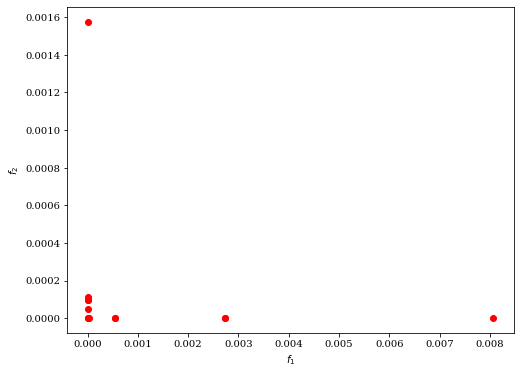

In [17]:
#-*- for folding -*-
# multi-objective optimization
res1,plot=optimize(RING)
plot.show()
# nelder-mead optimize usually used for match, need initial value
res = match(RING)

## Display

In [19]:
result1 = summary(RING,main=False)

circumference       :        6.35937
energy              :          2e+09
emitx               :    3.37949e-09
U0                  :        1.01505
alphac              :     0.00208567
e_spread            :    0.000442241
Qx                  :       0.247276
Qy                  :           0.25
taux                :         83.584
tauy                :         83.592
tauz                :         41.798
dQx                 :            0.0
dQy                 :            0.0
d2Qx                :            0.0
d2Qy                :            0.0
nature_chromx       :      -0.626678
nature_chromy       :      -0.629882
RI1                 :      0.0132636
RI2                 :     0.00450408
RI3                 :    0.000300272
RI4                 :   -4.28359e-07
RI5                 :    2.59466e-06
spin                :       -0.92376
damp_factor         :   -9.51048e-05
Jx                  :         1.0001
Jy                  :            1.0
Jz                  :         1.9999


In [20]:
display(RING)

No.   Name          :             s             l         betax        alphax         betay        alphay          etax         etapx           nux           nuy
0     START         :           0.0           nan      10.35038     -2.371824      1.968676      0.522018     0.2895522    0.06674815           0.0           0.0
1     F1            :           0.0           nan      10.35038     -2.371824      1.968676      0.522018     0.2895522    0.06674815           0.0           0.0
2     QF            :           0.3           0.3      10.35038      2.371824      1.968676     -0.522018     0.2895522   -0.06674815    0.00450921    0.02491118
3     LX03          :           0.4           0.1      9.882419      2.307811      2.079543    -0.5866555     0.2828774   -0.06674815   0.006082894     0.0327803
4     SF            :           0.6           0.2      8.984899      2.179786       2.34006    -0.7159305     0.2695278   -0.06674815   0.009461165    0.04722969
5     LX03          :       

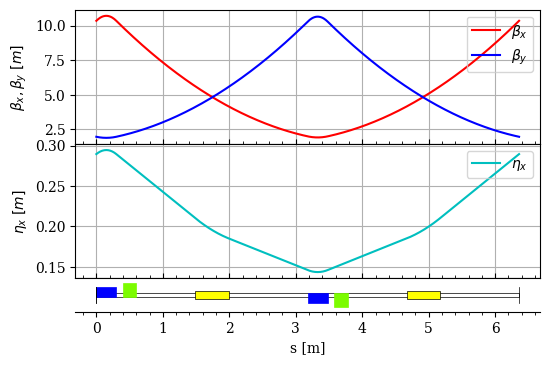

In [23]:
opti=OpticsPlot(RING )
opti.draw(["betax","betay","etax","H0"],dpi=100 )

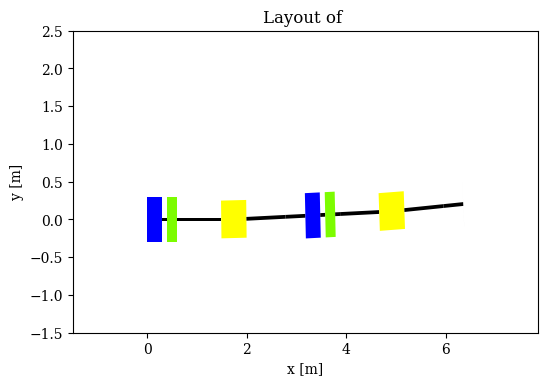

In [31]:
layout= Layout()
# [elem_type,x,y,theta,angle,length]
kinds= [ elem["kind"] for elem in RING[:] ]
datas= RING[:,["Gx","Gy","thetax","angle","l"] ][1].tolist()
datas=  [ [kind] + datas[i] for i, kind in enumerate(kinds)]
layout.add_beamline(datas)
# datas